In [1]:
import pandas as pd
import sqlalchemy as sql
import pyodbc as pyo
import numpy as np

In [2]:
server = 'CALUMO-949324'
driver = 'SQL+Server'
db = 'Calumo'
myQuery = '''SELECT *from Users'''
engine = sql.create_engine('mssql+pyodbc://{}/{}?driver={}'.format(server, db, driver))
Users = pd.read_sql_query(myQuery, engine)

In [3]:
myQuery2 = '''SELECT *from ReportPerformanceEvent'''

In [4]:
RPF = pd.read_sql_query(myQuery2, engine)

In [5]:
myQuery3 = 'Select * from UserGroups'

In [6]:
UG = pd.read_sql_query(myQuery3, engine)

In [20]:
df = pd.merge(Users, RPF,left_on='LoginID', right_on='UserName', how = 'left').rename(columns={'LoginID':'userLogin','Id_x':'UserKey'})



In [21]:
df

,UserKey,userLogin,FirstName,LastName,Explorer,StartPage,Email,ShowExplorer,ADAccountName,LocaleIdentifier,Culture,IsDeleted,StartPageType,StartPageOption,StartPageID,LicenseType,CreatedBy,Created,ModifiedBy,Modified,Id_y,EventTime,UserName,IpAddress,ReportName,IsPrivate,Publisher,CalcTime,ServerTime,RenderTime,Browser,BrowserVersion,NetworkTime,ServerCalcTime,ServerRenderBuildTime,IsSkylights,IsDevice,HadWriteback,ClientEventTime,IsMemberDrilling,IsBursted,OriginalQueryString,QueryString
0,1,spf\jsummerton,James,Summerton,0,None,jsummerton@calumo.com,0,jsummerton@spf.local,None,None,False,None,None,NaN,1,,1753-01-01,,1753-01-01,8291.0,None,spf\jsummerton,203.220.13.206,Budget GL Review,False,phoebephuah7076,3238.0,2956.0,202.0,Chrome,66,78.0,2684.0,271.0,False,False,False,None,False,False,None,None
1,1,spf\jsummerton,James,Summerton,0,None,jsummerton@calumo.com,0,jsummerton@spf.local,None,None,False,None,None,NaN,1,,1753-01-01,,1753-01-01,8292.0,None,spf\jsummerton,203.220.13.206,Budget GL Review,False,phoebephuah7076,3093.0,2901.0,124.0,Chrome,66,63.0,2810.0,91.0,False,False,False,None,True,False,None,None
2,1,spf\jsummerton,James,Summerton,0,None,jsummerton@calumo.com,0,jsummerton@spf.local,None,None,False,None,None,NaN,1,,1753-01-01,,1753-01-01,8297.0,None,spf\jsummerton,203.220.13.206,Budget GL Review,False,phoebephuah7076,2381.0,2155.0,142.0,Chrome,66,83.0,2089.0,66.0,False,False,False,None,False,False,None,None
3,1,spf\jsummerton,James,Summerton,0,None,jsummerton@calumo.com,0,jsummerton@spf.local,None,None,False,None,None,NaN,1,,1753-01-01,,1753-01-01,8299.0,None,spf\jsummerton,203.220.13.206,Budget GL Review,True,jsummerton,2196.0,1952.0,178.0,Chrome,66,62.0,1871.0,81.0,False,False,False,None,False,False,None,None
4,1,spf\jsummerton,James,Summerton,0,None,jsummerton@calumo.com,0,jsummerton@spf.local,None,None,False,None,None,NaN,1,,1753-01-01,,1753-01-01,8409.0,None,spf\jsummerton,203.220.13.206,Budget GL Review,False,phoebephuah7076,2608.0,1945.0,530.0,Chrome,66,114.0,1870.0,74.0,False,False,False,None,False,False,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22312,25,caas\deirdreblythe0322,Deirdre,Blythe,0,None,deirdre.blythe@artscentremelbourne.com.au,0,deirdreblythe0322@caas.local,None,None,False,None,None,3.0,1,,1753-01-01,,1753-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22313,26,caas\sarahlorimer1300,Sarah,Lorimer,0,None,sarah.lorimer@artscentremelbourne.com.au,0,sarahlorimer1300@caas.local,None,None,True,None,None,NaN,1,,1753-01-01,,1753-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22314,27,spf\plan,Peter,Lan,0,None,plan@calumo.com,0,plan@spf.local,None,None,False,None,None,NaN,1,,1753-01-01,,1753-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22315,28,caas\martincanty9653,Martin,Canty,0,None,martin.canty@artscentremelbourne.com.au,0,martincanty9653@caas.local,None,None,False,None,None,NaN,1,,1753-01-01,,1753-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
pd.set_option('display.max_columns', 50)

In [23]:
Name = df['FirstName'] +" " + df['LastName']

In [24]:
df.insert(1,"Name",Name)

In [25]:
CurrentUser = df['IsDeleted'] == 0

In [26]:
CurrentUser.value_counts()

True     19888
False     2429
Name: IsDeleted, dtype: int64

In [27]:
df = df[(df['IsDeleted'] == 0) & (df['Name'].notna())]

In [28]:
df.groupby (['Name', 'Email','UserKey']).agg({'Id_y':np.size}).rename(columns={'Id_y':'UsageCount'})

,,,UsageCount
Name,Email,UserKey,
Casey Centenera,casey.centenera@artscentremelbourne.com.au,9,3335.0
Chris Kim,ckim@calumo.com,23,2.0
David Elsey,delsey@calumo.com,4,169.0
Deirdre Blythe,deirdre.blythe@artscentremelbourne.com.au,25,1.0
Geoffrey Gillian,ggillian@calumo.com,19,135.0
James Hodge,james.hodge@artscentremelbourne.com.au,22,1.0
James Lockyer,james.lockyer@artscentremelbourne.com.au,10,91.0
James Summerton,jsummerton@calumo.com,1,13.0
Jamie McMillan,jamie.mcmillan@artscentremelbourne.com.au,12,2738.0


SQL

BEGIN
SELECT 
U.FirstName + ' ' + U.LastName as UserName
,' ' + ISNULL(CONVERT(CHAR(11), CONVERT(datetime, SWITCHOFFSET(MIN(EventTime), DATEPART(TZOFFSET, 
		MIN(EventTime) AT TIME ZONE 'AUS Eastern Standard Time'))), 113),'-') as FirstUsedTime
,' ' + ISNULL(CONVERT(CHAR(11), CONVERT(datetime, SWITCHOFFSET(MAX(EventTime), DATEPART(TZOFFSET, 
		MAX(EventTime) AT TIME ZONE 'AUS Eastern Standard Time'))), 113),'-') as LastUsedTime
,COUNT(rpe.Id) as UsageCount
,u.LoginID as userLogin
,u.Email as userEmail
,u.Id as userKey
FROM Users u with (nolock) 
LEFT JOIN ReportPerformanceEvent  rpe with (nolock) on u.LoginID = rpe.UserName
WHERE UserName IS NOT NULL
 AND u.IsDeleted = 0
GROUP BY UserName, u.isDeleted, u.LoginID, u.Email, u.Id, u.FirstName, u.LastName
ORDER BY UserName
END
GO

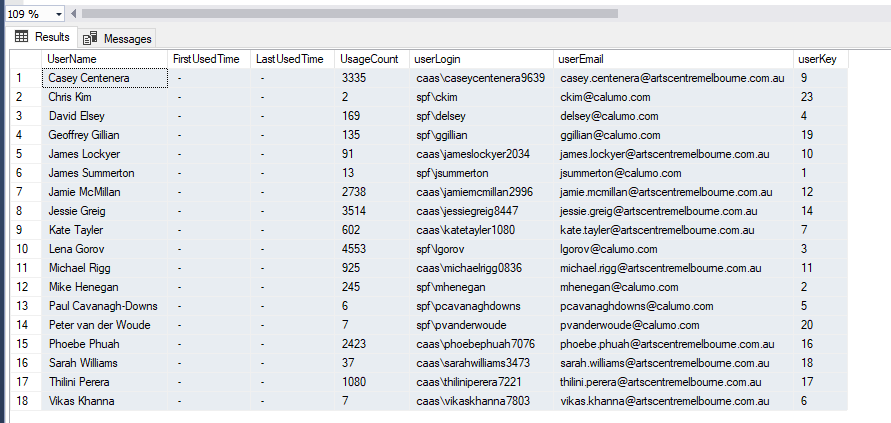